In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import pickle
with open('dados/depresso.pkl', 'rb') as f:
  X_prev, X_test, y_classe, y_test = pickle.load(f)

In [9]:
param_distributions = {
    'C': [0.05, 0.1, 0.2, 0.3],  # Valores para o parâmetro de regularização
    'kernel': ['linear', 'poly'],  # Diferentes tipos de kernels
    'degree': [1, 2, 3]  # Para o kernel polinomial
}

In [10]:
svm_model = SVC()

In [11]:
modelo = RandomizedSearchCV(estimator=svm_model, param_distributions=param_distributions, 
                                   n_iter=100, cv=3, verbose=1, random_state=42, n_jobs=-1, scoring='accuracy')

In [12]:
modelo.fit(X_prev, y_classe)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/home/eduardoavs/PUC/S4/IA/TP/ambiente/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.05, 0.1, 0.2, 0.3],
                                        'degree': [1, 2, 3],
                                        'kernel': ['linear', 'poly']},
                   random_state=42, scoring='accuracy', verbose=1)

In [13]:
melhor_modelo = modelo.best_estimator_
previsoes = melhor_modelo.predict(X_test)

In [14]:
modelo.best_params_

{'kernel': 'poly', 'degree': 3, 'C': 0.2}

In [15]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)

array([[ 1433,   226],
       [ 4645, 11863]])

0.7318764793306545

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

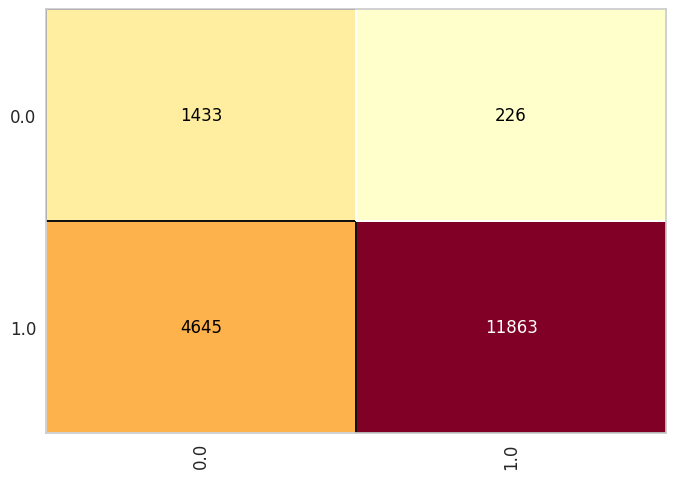

In [16]:
cm = ConfusionMatrix(modelo)
cm.fit(X_prev, y_classe)
cm.score(X_test, y_test)

In [17]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         0.0       0.24      0.86      0.37      1659
         1.0       0.98      0.72      0.83     16508

    accuracy                           0.73     18167
   macro avg       0.61      0.79      0.60     18167
weighted avg       0.91      0.73      0.79     18167



In [18]:
nomes_das_features = ['C009_1',
 'C009_2',
 'C009_3',
 'C011_1.0',
 'C011_2.0',
 'C011_3.0',
 'C011_4.0',
 'C006',
 'C00703',
 'D00901',
 'J007',
 'M01401',
 'M01501',
 'M01601',
 'M01901',
 'N001',
 'N00101',
 'N010',
 'N011',
 'N012',
 'N013',
 'N014',
 'N015',
 'N016',
 'N017',
 'N018',
 'P018',
 'P02002',
 'P02602',
 'P027',
 'P034',
 'P04502',
 'P050',
 'Q120',
 'V00201',
 'V00203',
 'V02802',
 'H001',
 'VDF002']

In [19]:
import shap

# Criar o explainer
explainer = shap.KernelExplainer(melhor_modelo.decision_function, X_prev[:100])  # Amostras representativas
# Gerar valores SHAP para 10 exemplos de teste
shap_values = explainer.shap_values(X_test[:50])


  0%|          | 0/50 [00:00<?, ?it/s]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

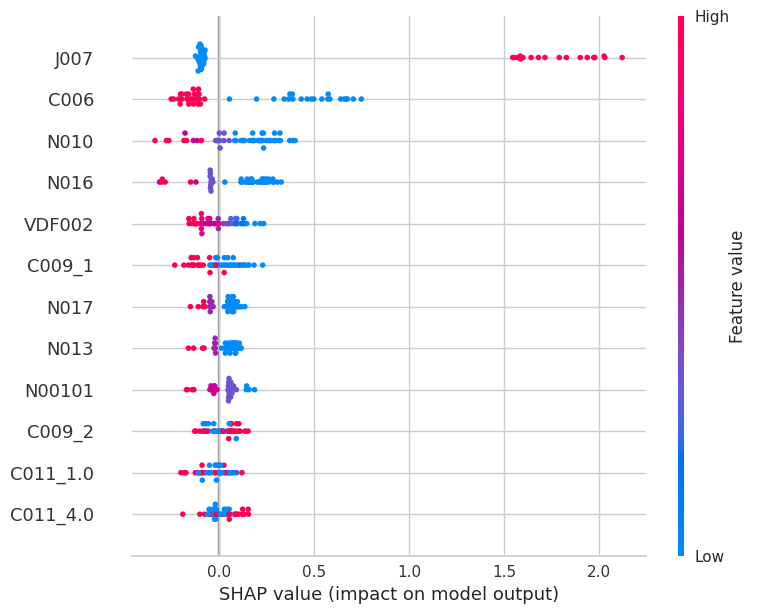

In [20]:
shap.summary_plot(shap_values, X_test[:50], feature_names=nomes_das_features, plot_type="dot", color_bar=True, max_display=12)